In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def get_max_curv (mag, mag_bin = 0.1):

    m_bins, cum_mag, non_cum_mag = get_freq_mag_dist(mag, mag_bin)
    m_cutoff = m_bins[non_cum_mag == non_cum_mag.max()]

    return m_cutoff



def get_freq_mag_dist(mag, mag_bin = 0.1, debug = False):
    '''
    Calculates the frequency-magnitude distribution of a seismic catalogue
    Inputs: 
    mag - array containing magnitude of events
    mag_bin - bin size to use
    Returns:
    m_vals - magnitude values in distribution
    cum_mag - cumulative magnitude distribution
    non_cum_mag - non-cumulative magnitude distribution
    '''
    
    # create mag bins
    min_val = min(round(mag/mag_bin)*mag_bin)
    max_val = max(round(mag/mag_bin)*mag_bin)
    m_vals = np.arange(min_val, max_val, mag_bin)

    # nbm =m_vals.shape[0]
    cum_mag = np.zeros_like(m_vals) # cumulative magnitude
    if debug:
        print(cum_mag.shape)
        print(m_vals.shape)
    
    # calculated cumulative moment distribution 
    for i in np.arange(m_vals.shape[0]):
        cum_mag[i] = (mag > (m_vals[i] - mag_bin/2)).sum()

    # calculated non-cumulative moment
    dummy_cum_mag = np.concatenate([cum_mag, [0]])
    non_cum_mag = np.abs(dummy_cum_mag[1:] - dummy_cum_mag[:-1])

    return (m_vals, cum_mag, non_cum_mag)


In [16]:
test_file = 'SUeq_data.csv'

# some parameters here
mbin = 0.1
num_runs = 300 # bootstrapping to get some spread

# open test file
test_df = pd.read_csv(test_file, header  = 'infer', sep = ',')
# test_df = test_df.loc[test_df['CLASS'] == 'DGOING']
# test_df = test_df.loc[test_df['CLASS'] == 'UPPER']
test_df = test_df[(test_df['DATE'] >= '26-12-1982') | (test_df['DATE'] <= '26-12-2004')]
test_df = test_df[test_df['DEPTH'] > 80]

# test_df = test_df[test_df["AUTHOR"].isin(["GCMT", "gcmt"])]
# print(test_df.shape)
# print(test_df[test_df['MW'] < 4.9])

In [17]:

# run the function
m_cut_arr = np.zeros(num_runs)
num_ev = test_df["MW"].shape[0]

for i in np.arange(num_runs):
    mw_sample = test_df["MW"].sample(num_ev, replace = True)
    m_cut = get_max_curv(mw_sample)
    if len(m_cut > 0): # happens sometimes
        m_cut = m_cut.mean()
    m_cut_arr[i] = m_cut


m_cut = m_cut_arr.mean()
m_cut_err = m_cut_arr.std()

print("cut-off magnitude: ", m_cut)
print("cut-off error: ", m_cut_err)

# calculate b-value using maximum likelihood (Aki 1965)
# another way of computing b
diff_mag = (ev_above_cut["MW"] - m_cut - mbin/2)
b_est2 = 1/diff_mag.mean()
b_est2 = b_est2/np.log(10)
b_err2 = b_est2/np.sqrt(ev_above_cut.shape[0])

print("Estimated b-value: ", b_est)
print("b-value error: ", b_err)

print("Second estimated b-value: ", b_est2)
print("Second b-value error: ", b_err2)

cut-off magnitude:  5.1935
cut-off error:  0.03957377077476093


NameError: name 'ev_above_cut' is not defined

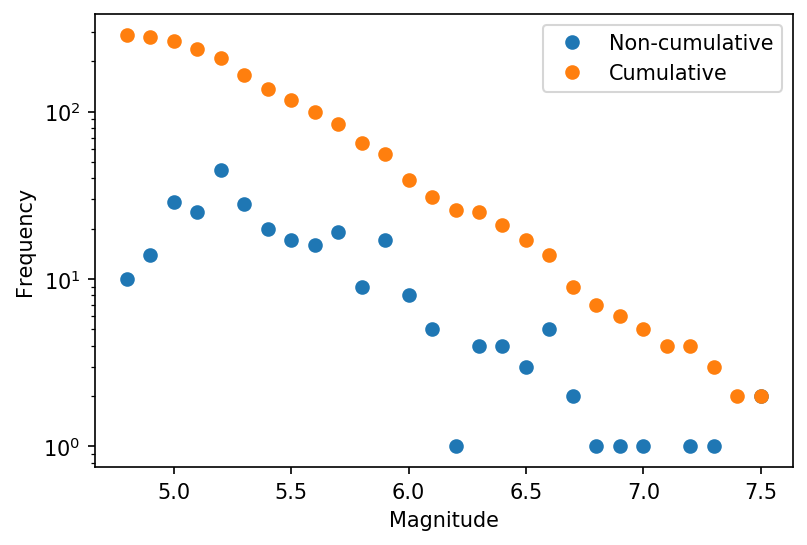

In [18]:
# look at the hist for the entire catalog
m_vals, cum_mag, non_cum_mag = get_freq_mag_dist(test_df["MW"], mag_bin = 0.1)

fig, ax = plt.subplots(dpi = 150)
ax.plot(m_vals, non_cum_mag, 'o', label = "Non-cumulative")
ax.plot(m_vals, cum_mag, 'o',label = "Cumulative")
ax.set_xlabel("Magnitude")
ax.set_ylabel("Frequency")
ax.set_yscale("log")
ax.legend()